dit is het 4e bestand van testing

## Step 1: data preperation
The dataset is read and molecular desciptors are calculated. All discrete features are binarized. 

In [1]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from main import create_dataframe, check_normality


                                SMILES  PKM2_inhibition  ERK2_inhibition  \
0                 C=C(C)c1nc(N)nc(N)n1                0                0   
1       C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1                0                0   
2              C=CCNC(=O)CCCC(=O)NCC=C                0                0   
3  C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21                0                0   
4         C=CCn1cc(Cl)c(=O)n(CC=C)c1=O                0                0   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           5.313889        5.313889           0.120833        0.120833   
1          11.238954       11.238954           0.225308       -0.366756   
2          11.090706       11.090706           0.049610       -0.049610   
3          11.892238       11.892238           0.076632       -0.457824   
4          11.693580       11.693580           0.012315       -0.498260   

        qed        SPS    MolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0  0.592228   

In [2]:
#import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [3]:
# Create dataframe
df_all_info = create_dataframe(data_raw)
df_all_info.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# delete PKM2_inhibition and ERK2_inhibition, as these are not features 
df_features = df_all_info.drop(columns = ['PKM2_inhibition','ERK2_inhibition'])
df_features.head()

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#check if column has descrete values
def is_discrete(col):
    # check if column is numeric
    if pd.api.types.is_numeric_dtype(col):
        # check for all non NaN-values if they are an integer
        return all(col.dropna().apply(lambda x: float(x).is_integer()))
    return False

# binarize column
def binarize_column(col):
    return col.apply(lambda x: 1 if x != 0 else 0)

df_features_binarized = df_features.copy()
# check if binirazing is needed, and if so --> do that
for column in df_features_binarized.columns:
    if is_discrete(df_features_binarized[column]):
        df_features_binarized[column] = binarize_column(df_features_binarized[column])

df_features_binarized.head()

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Exploratory data analysis
A check is done to see if there is data missing. Columns that do not provide extra information (only the same value in the whole column) are removed. The summary statistics are provided. The data is checked for normal distribution. 

Moreover, descriptor selection is done based on PCA. 80% variance is captured with the pricinpal components that are used. For each principal component, the 4 features with the highest absolute loading are selected. 

In [6]:
# check if there are values missing in columns
nan_counts = df_features_binarized.columns[df_features_binarized.isnull().any()].tolist()
print('The amount of columns where values are missing values is:', len(nan_counts))

The amount of columns where values are missing values is: 0


In [7]:
# check if there are columns with only the same value
non_variating_columns = df_features_binarized.columns[df_features_binarized.nunique()==1].tolist()
print('The columns that only have the same value in them are:', non_variating_columns)

# remove the columns with only the same value, because molecules cannot be differentiated on those columns
if len(non_variating_columns) != 0:
    df_features_binarized.drop(columns = non_variating_columns, inplace = True)
    df_features_binarized.describe()

The columns that only have the same value in them are: ['NumValenceElectrons', 'NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'HeavyAtomCount', 'NOCount', 'NumHeteroatoms', 'fr_HOCCN', 'fr_SH', 'fr_aldehyde', 'fr_azide', 'fr_azo', 'fr_benzodiazepine', 'fr_diazo', 'fr_epoxide', 'fr_hdrzine', 'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_term_acetylene', 'fr_thiocyan']


In [8]:
# look at the summary statistics
df_features_binarized.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,MaxPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,11.755641,11.755641,0.163540,-1.049675,0.684839,15.241012,347.818473,328.200409,347.458997,0.272817,...,0.156810,0.156810,0.177419,0.150538,0.020609,0.039427,0.046595,0.074373,0.069892,0.051075
std,2.232314,2.232314,0.183773,1.534098,0.148925,5.621078,71.906315,68.148378,71.829989,0.067942,...,0.363785,0.363785,0.382194,0.357758,0.142136,0.194695,0.210864,0.262494,0.255080,0.220250
min,3.295899,3.295899,0.000269,-6.846394,0.243857,9.066667,151.173000,142.101000,151.085795,-0.001171,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.862167,11.862167,0.046637,-1.242713,0.581350,11.113324,295.335500,278.281750,295.047004,0.234355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.412161,12.412161,0.105302,-0.404874,0.700589,14.273504,348.316500,328.242000,347.625500,0.261563,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.892687,12.892687,0.205572,-0.123116,0.803140,17.368908,401.547500,378.322250,401.220656,0.321559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.950036,14.950036,1.101853,1.101853,0.945352,72.187500,592.649000,556.361000,592.253314,0.477800,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# check if the values are normally destributed per column
normality_results = check_normality(df_features_binarized.iloc[:,1:]) # test all columns, except 'SMILES'

# print which columns are normally distributed
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"Column {column} is normally distributed (p-value = {p_value:.5f})")
print('Done with printing columns that are normally distributed')

Done with printing columns that are normally distributed


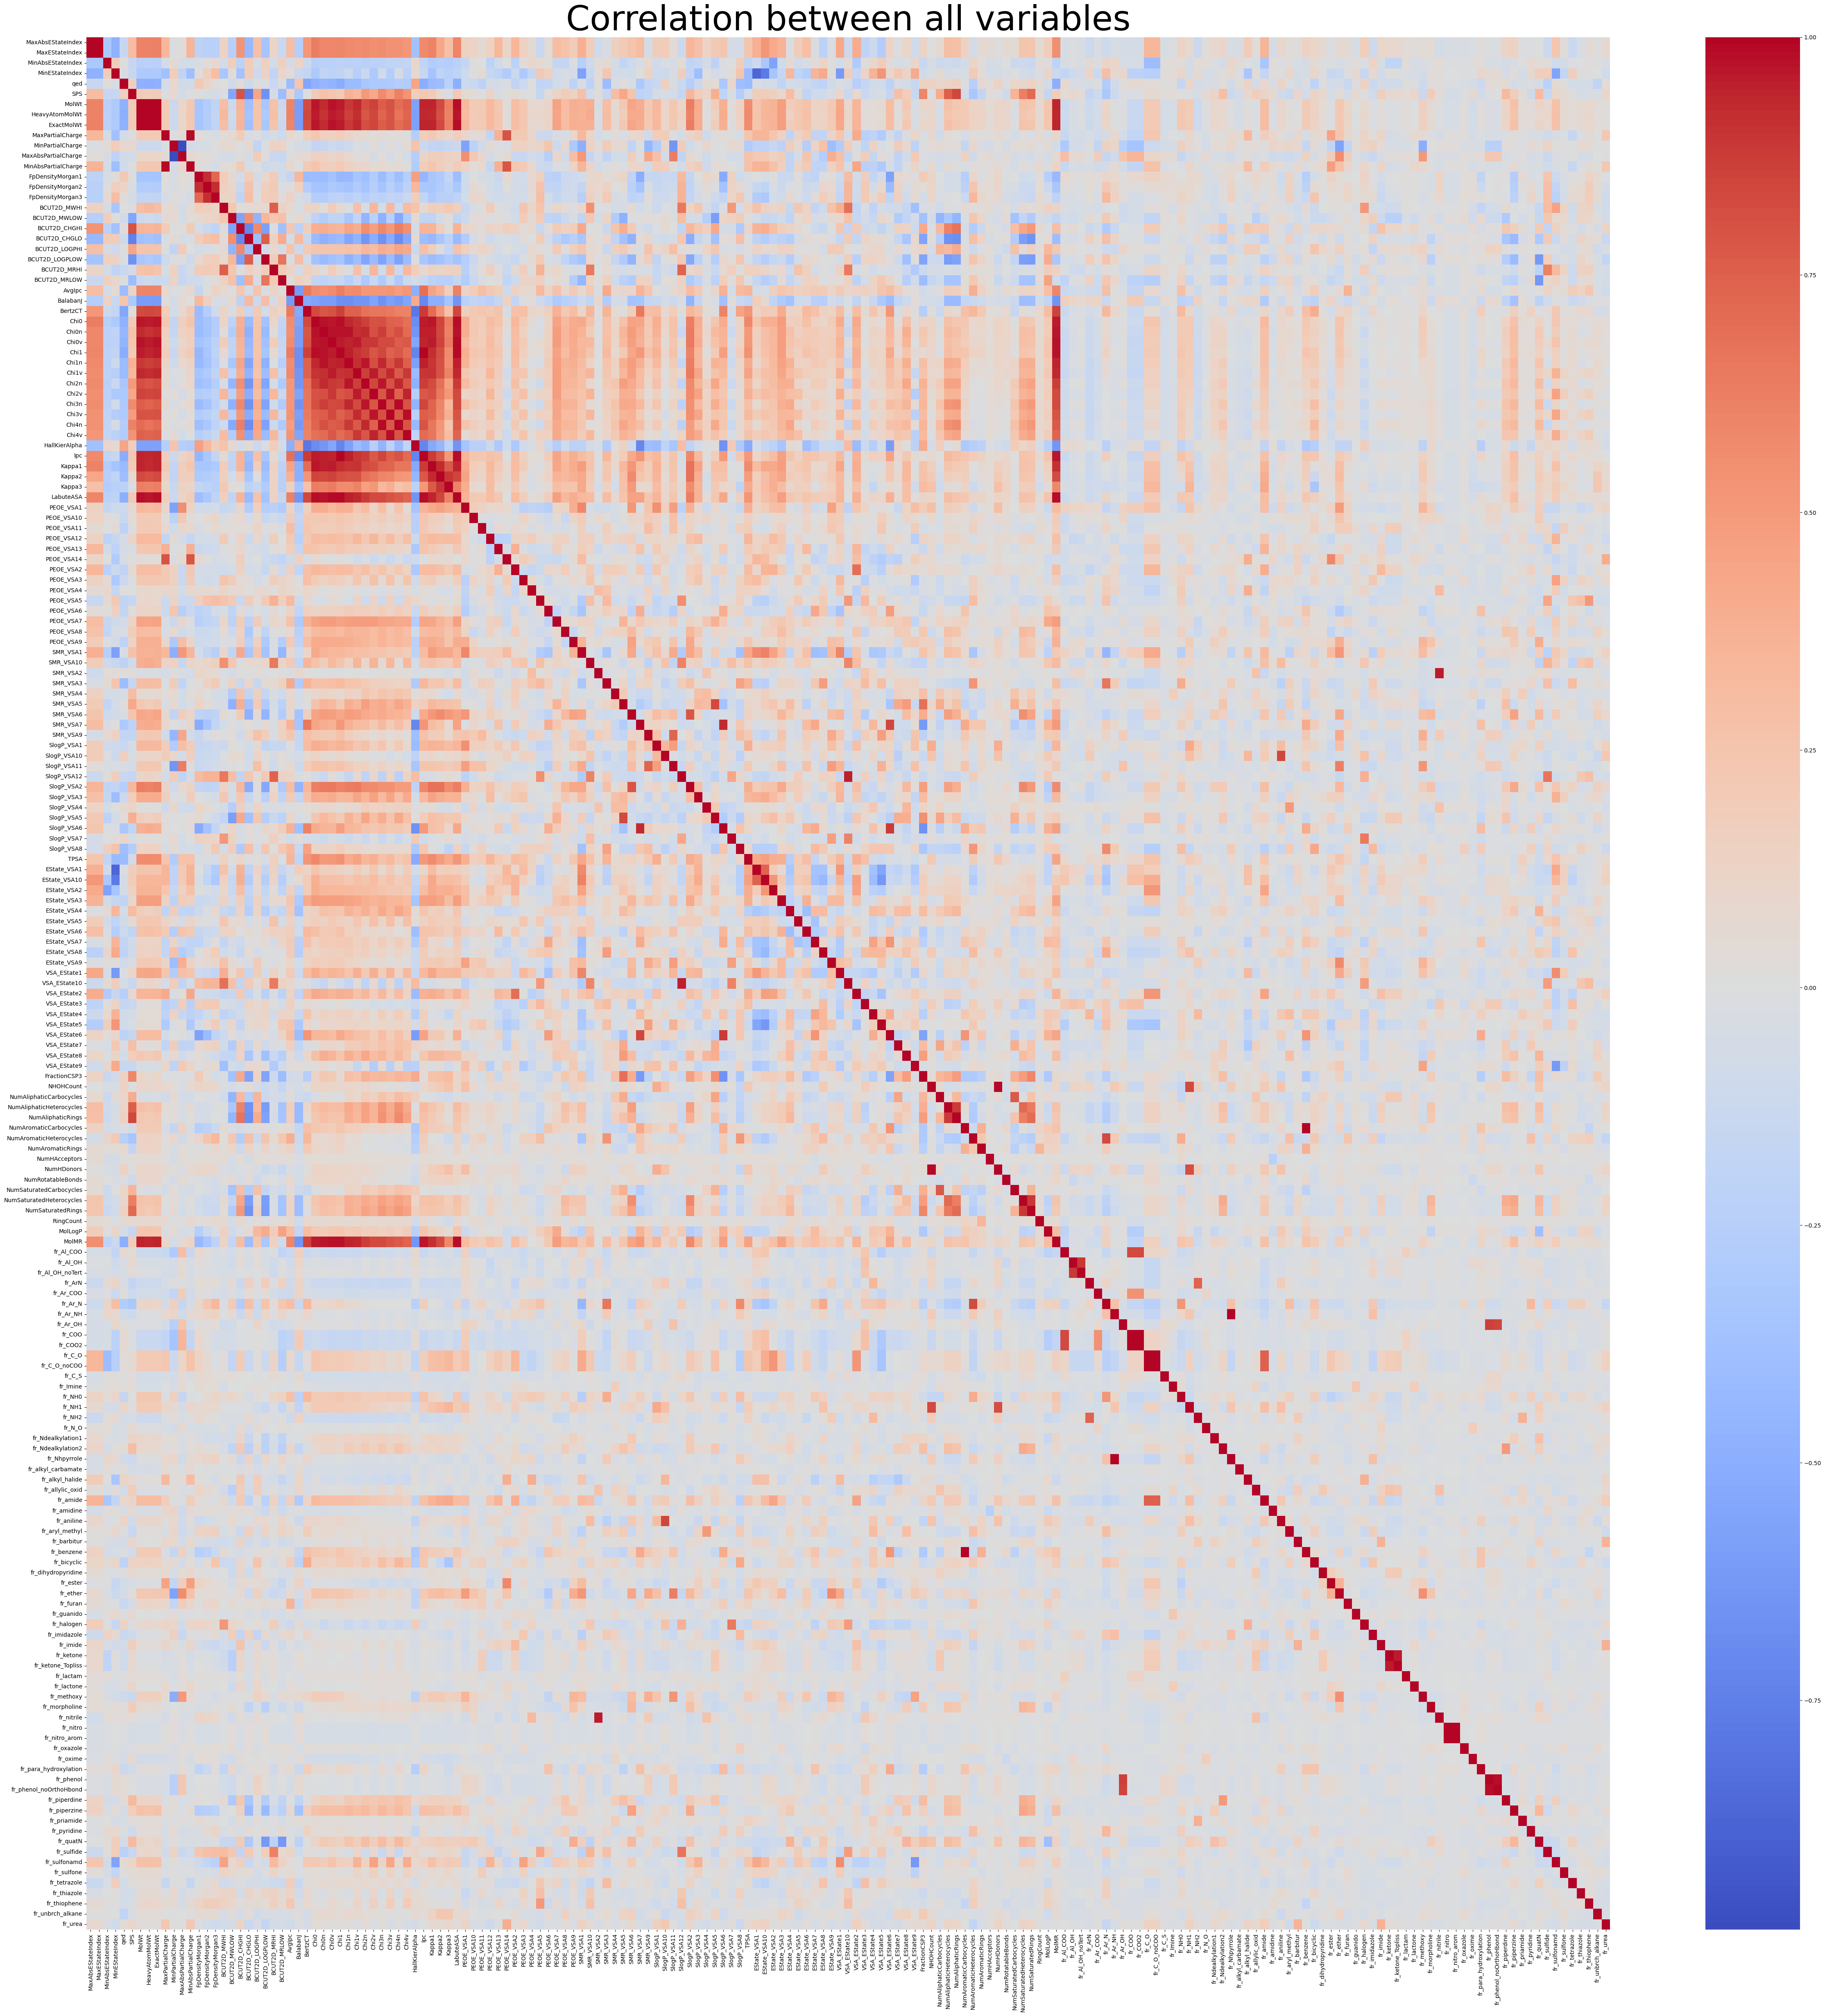

In [10]:
# make a correlation matrix to see the correlation between the descriptors
# Spearman test is used because there are no features with normal distribution
correlation_matrix = df_features_binarized.iloc[:,1:].corr(method = 'spearman')

# make a heatmap to visualize the correlation matrix
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation between all variables', fontdict={'fontsize' : 60});

In [11]:
# given that there are no columns with normal distribution, min-max scaling is performed on the dataset
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_features_binarized.iloc[:,1:])
df_features_scaled = pd.DataFrame(scaled_array, columns=df_features_binarized.iloc[:,1:].columns)

# show summary statistics of scaled features
df_features_scaled.describe()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,MaxPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.725900,0.725900,0.148215,0.729308,0.628632,0.097818,0.445427,0.449233,0.445122,0.572035,...,0.156810,0.156810,0.177419,0.150538,0.020609,0.039427,0.046595,0.074373,0.069892,0.051075
std,0.191547,0.191547,0.166826,0.193011,0.212297,0.089053,0.162877,0.164506,0.162818,0.141850,...,0.363785,0.363785,0.382194,0.357758,0.142136,0.194695,0.210864,0.262494,0.255080,0.220250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.735041,0.735041,0.042092,0.705021,0.481105,0.032424,0.326547,0.328733,0.326319,0.491733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.782234,0.782234,0.095347,0.810433,0.651084,0.082490,0.446555,0.449334,0.445499,0.548538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.823466,0.823466,0.186371,0.845882,0.797273,0.131529,0.567130,0.570225,0.566984,0.673800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# perform PCA
pca = PCA()
pca.fit(df_features_scaled)

PCA()

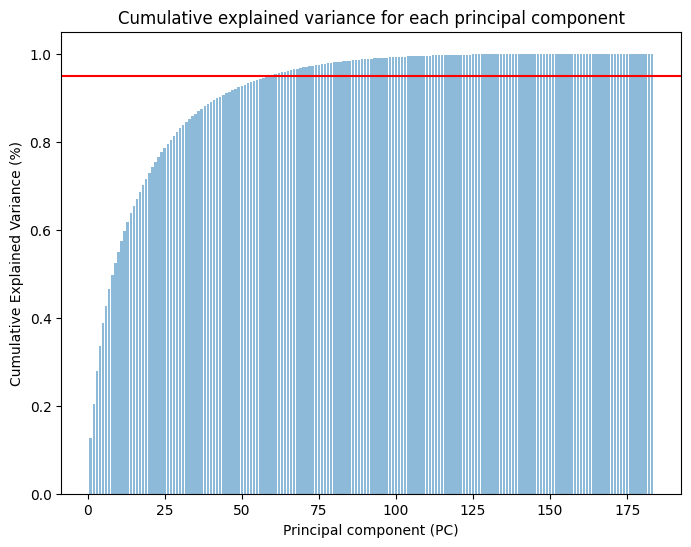

In [13]:
#calculate the cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#visualize the cumulative explained variance in a graph
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

#make a threshold line based on the cumulative explained variance threshold that is chosen
cum_var_threshold = 0.95
plt.axhline(y=cum_var_threshold,color='r',linestyle='-')

plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative explained variance for each principal component');

In [14]:
# number of principal components that are chosen based on the threshold
num_components = np.argmax(cumulative_variance >= cum_var_threshold) + 1
print(f'The amount of principal components needed to capture at least {round(cum_var_threshold*100)}% variance is {num_components}.')

The amount of principal components needed to capture at least 95% variance is 60.


In [15]:
# give the 4 most important features for the first 26 PCs

# Apply PCA with the desired number of components
pca = PCA(n_components=num_components)
pca_scores = pca.fit_transform(df_features_scaled)
df_pc_scores = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(num_components)])

# extract the loadings
loadings = pca.components_.T

# make dataframe of loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(num_components)], index=df_features_scaled.columns)

# determine the most important features for each principal component
top_features = loadings_df.apply(lambda x: x.abs().nlargest(4).index, axis=0) # for each PC, the best 4 PCs are used
print("\nMost important features for each of the first 26 principal components:")
top_features


Most important features for each of the first 26 principal components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,NumAliphaticHeterocycles,fr_NH1,fr_Ar_N,NHOHCount,fr_ether,fr_aniline,fr_bicyclic,fr_sulfonamd,fr_aryl_methyl,fr_bicyclic,...,fr_Ndealkylation1,PEOE_VSA3,fr_Ndealkylation1,fr_amide,fr_amidine,fr_NH1,fr_tetrazole,EState_VSA2,fr_oxazole,PEOE_VSA10
1,NumSaturatedRings,NumHDonors,NumAromaticHeterocycles,NumHDonors,fr_methoxy,fr_para_hydroxylation,fr_halogen,fr_ether,fr_sulfide,fr_halogen,...,qed,BCUT2D_MWHI,fr_sulfone,fr_NH1,fr_Ar_N,fr_piperdine,PEOE_VSA6,PEOE_VSA8,fr_halogen,SlogP_VSA3
2,NumAliphaticRings,NHOHCount,fr_bicyclic,fr_NH1,fr_amide,NumAromaticCarbocycles,fr_sulfonamd,fr_Ar_N,fr_sulfonamd,fr_Ar_NH,...,fr_tetrazole,fr_nitrile,BCUT2D_MWHI,NumAromaticRings,NumSaturatedCarbocycles,fr_Ar_N,SlogP_VSA3,PEOE_VSA3,NumAromaticHeterocycles,EState_VSA3
3,NumSaturatedHeterocycles,fr_amide,fr_NH0,fr_C_O,fr_C_O,fr_benzene,fr_para_hydroxylation,NumAromaticHeterocycles,fr_halogen,fr_Nhpyrrole,...,PEOE_VSA13,SlogP_VSA4,EState_VSA6,fr_Al_COO,SlogP_VSA1,fr_ArN,EState_VSA3,NumSaturatedCarbocycles,fr_Ar_N,MinAbsEStateIndex


In [16]:
df_pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-2.367709,-1.073459,-0.751796,1.126836,-0.042917,-0.056592,-0.229256,-0.788364,0.353846,-0.562869,...,0.060988,-0.069553,0.149650,0.000830,0.197383,-0.181429,-0.030723,0.152124,0.099063,-0.305484
1,-1.726677,-1.248099,-0.380539,-0.587696,0.717944,0.222400,-0.204420,-0.010358,0.363391,0.640686,...,0.153843,0.025243,-0.018038,0.093688,0.273780,0.086365,0.022223,0.016430,-0.212112,-0.135356
2,-0.751331,-0.344535,-2.087344,0.537928,-0.581467,-0.631152,0.124824,0.006918,0.102725,-0.400037,...,0.007372,-0.267234,-0.046031,-0.343549,-0.127028,-0.117051,-0.095887,-0.002137,-0.111228,-0.325551
3,-1.925196,-1.159886,0.306264,-0.516936,0.287169,0.463237,0.486735,-0.053480,-0.116935,0.163652,...,-0.441981,-0.240001,-0.210816,-0.163780,0.085792,-0.022257,-0.025461,0.079383,-0.096317,-0.090215
4,-2.064737,-1.615267,-0.379101,-0.120133,-0.485778,-0.369130,-0.768414,-0.331014,-0.347266,0.340358,...,-0.137195,0.071650,0.155189,0.133874,0.253937,-0.090045,-0.050790,0.074611,-0.137491,-0.164595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.517389,0.750525,-0.174390,-0.138408,0.324997,0.402801,0.705005,-0.163979,0.059645,0.140070,...,-0.010947,0.215286,-0.040353,0.050403,0.044904,0.141468,0.157692,0.047103,-0.211036,0.024899
1112,-1.385595,0.605844,0.776132,0.754133,0.020180,0.583342,-0.931139,1.064344,0.256907,1.373182,...,-0.017663,0.042977,-0.089308,0.228766,-0.006776,-0.123222,0.260388,0.003762,-0.168319,0.022439
1113,0.359130,-0.567615,1.226584,1.486007,0.469005,0.704843,-0.333929,-0.375369,-0.670314,0.094463,...,-0.309086,0.134941,-0.106084,0.183357,-0.203978,0.268261,0.061695,-0.098425,0.069625,0.150196
1114,-0.299151,-1.711323,1.338308,0.183599,0.010988,0.977300,-0.668233,-0.512256,-0.307168,-0.739433,...,-0.045699,0.088308,0.017699,-0.180529,0.137928,0.153553,0.066422,0.019628,-0.117902,0.009737


In [17]:
# make a list with all the imporant features
all_important_features = top_features.values.flatten()
impotant_features = list(set(all_important_features))
print('The amount of most important features is:', len(impotant_features))

The amount of most important features is: 80


In [18]:
# make a dataframe with the only the most important features
df_important_features = df_features_scaled[impotant_features]

print("New DataFrame with only the important features:")
df_important_features.head()

New DataFrame with only the important features:


,NumAliphaticRings,fr_ketone,PEOE_VSA8,fr_urea,fr_phenol,fr_imidazole,fr_amidine,fr_Ar_NH,fr_allylic_oxid,fr_halogen,...,fr_sulfonamd,fr_phenol_noOrthoHbond,NumSaturatedRings,fr_quatN,NumAromaticCarbocycles,fr_tetrazole,NHOHCount,fr_furan,NumSaturatedHeterocycles,fr_Ndealkylation1
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.331947,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.381698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.191210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.283889,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


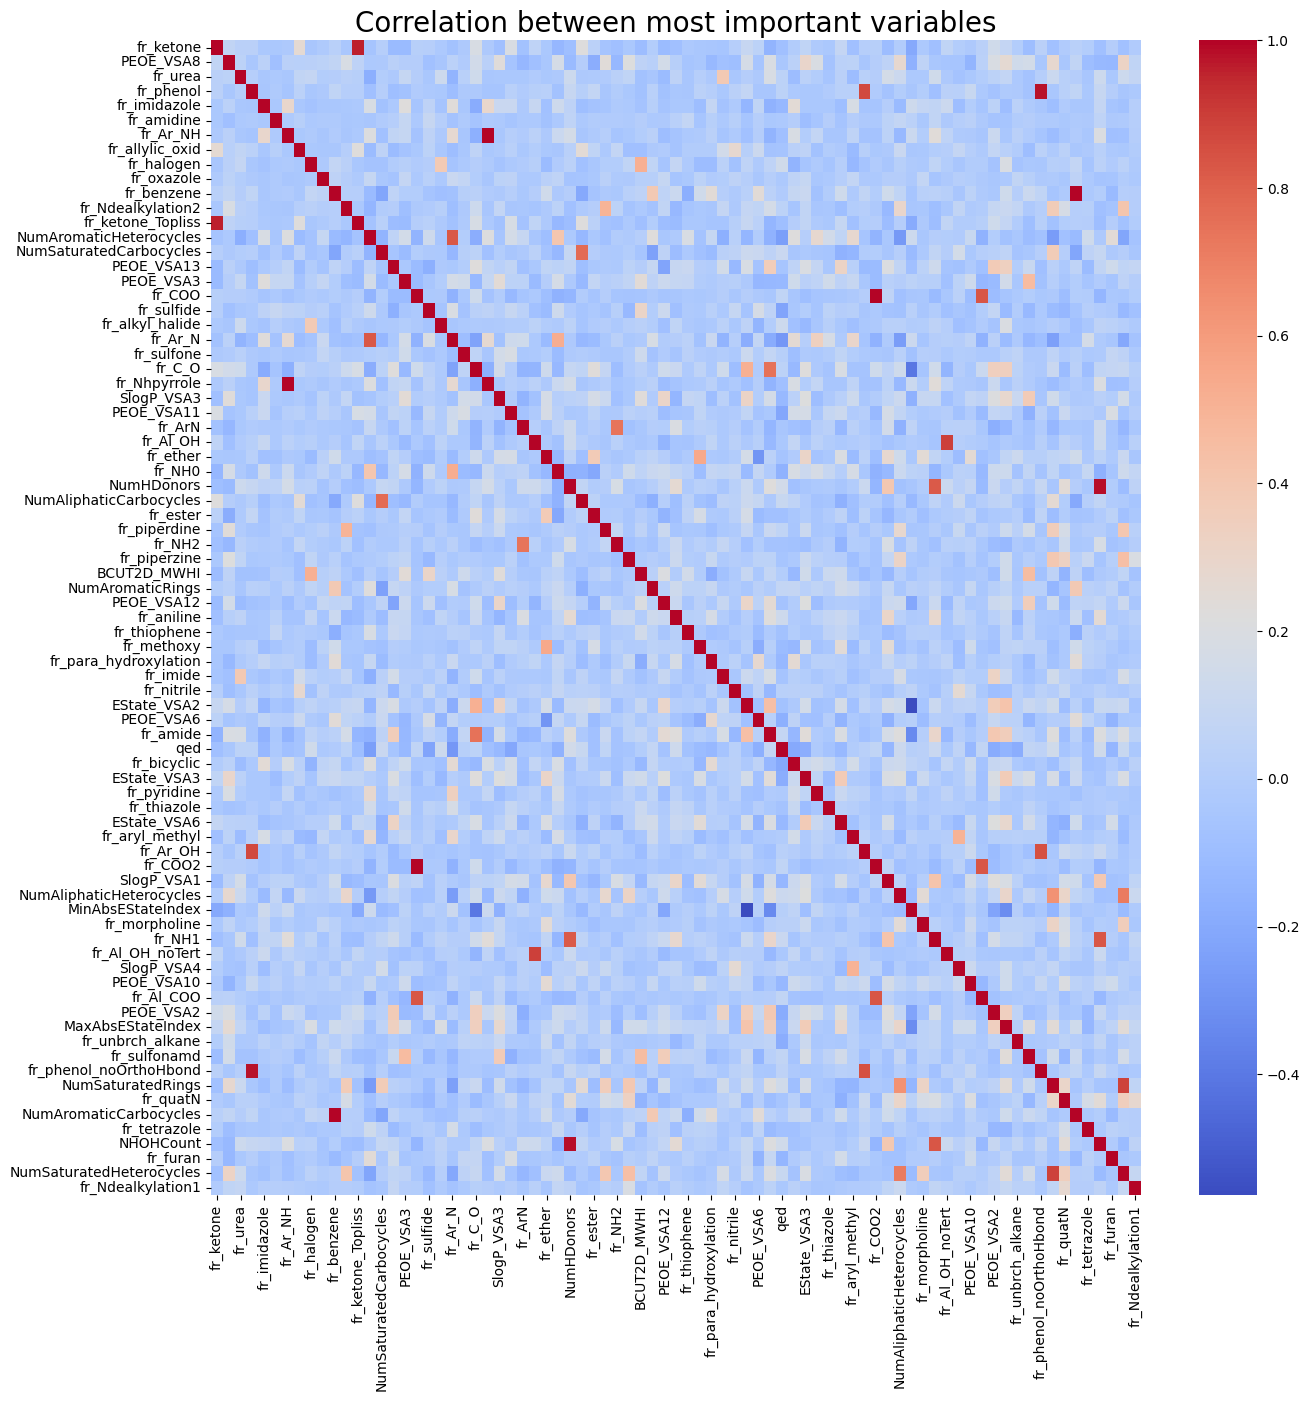

In [19]:
# make a new correlation matrix to see if the correlation between variables has improved
correlation_matrix = df_important_features.iloc[:,1:].corr(method = 'spearman') # use Spearman test because no normality assumed

# make a heatmap to visualize the new correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation between most important variables', fontdict={'fontsize' : 20});


## Step 3: test different machine learning models
Logistic regression, decision tree and random forest are tested. They are tested on both predicting the inhibition for both at once and the inhibion for both seperately.

### Step 3a)
First, the models are tested on predicting both inhibitions at once.

In [20]:
# make a new dataframe with an extra column that has score for inhibition
#0 - no inhibition, 1 - PKM2 inhibition, 2 - ERK2 inhibition, 3 - both inhibition

for index, row in data_raw.iterrows():
    
    if row['PKM2_inhibition'] == 0 and row['ERK2_inhibition'] == 0:
        data_raw.at[index, 'Inhibition'] = 0
        
    elif row['PKM2_inhibition'] == 1 and row['ERK2_inhibition'] == 0:
        data_raw.at[index, 'Inhibition'] = 1
        
    elif row['PKM2_inhibition'] == 0 and row['ERK2_inhibition'] == 1:
        data_raw.at[index, 'Inhibition'] = 2
        
    elif row['PKM2_inhibition'] == 1 and row['ERK2_inhibition'] == 1:
        data_raw.at[index, 'Inhibition'] = 3
        
df_pc_scores['Inhibition'] = data_raw['Inhibition']
df_pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,Inhibition
0,-2.367709,-1.073459,-0.751796,1.126836,-0.042917,-0.056592,-0.229256,-0.788364,0.353846,-0.562869,...,-0.069553,0.149650,0.000830,0.197383,-0.181429,-0.030723,0.152124,0.099063,-0.305484,0.0
1,-1.726677,-1.248099,-0.380539,-0.587696,0.717944,0.222400,-0.204420,-0.010358,0.363391,0.640686,...,0.025243,-0.018038,0.093688,0.273780,0.086365,0.022223,0.016430,-0.212112,-0.135356,0.0
2,-0.751331,-0.344535,-2.087344,0.537928,-0.581467,-0.631152,0.124824,0.006918,0.102725,-0.400037,...,-0.267234,-0.046031,-0.343549,-0.127028,-0.117051,-0.095887,-0.002137,-0.111228,-0.325551,0.0
3,-1.925196,-1.159886,0.306264,-0.516936,0.287169,0.463237,0.486735,-0.053480,-0.116935,0.163652,...,-0.240001,-0.210816,-0.163780,0.085792,-0.022257,-0.025461,0.079383,-0.096317,-0.090215,0.0
4,-2.064737,-1.615267,-0.379101,-0.120133,-0.485778,-0.369130,-0.768414,-0.331014,-0.347266,0.340358,...,0.071650,0.155189,0.133874,0.253937,-0.090045,-0.050790,0.074611,-0.137491,-0.164595,0.0


In [21]:
# split the dataset in training and test set
X_set = df_pc_scores.iloc[:, :-1].values
y_set = df_pc_scores.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)

In [22]:
# try the random forest model
num_estimators = 100 # change this variable to test different number of estimators

rf = RandomForestClassifier(n_estimators=num_estimators, random_state=42) # initiate Random Forest
rf.fit(X_train, y_train) # fit random forest
y_pred = rf.predict(X_test) # make predictions

# evaluate random forest
cm_rf = confusion_matrix(y_test, y_pred)
cr_rf = classification_report(y_test, y_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL: \n')
print(f'Confusion Matrix:\n{cm_rf} \n')
print(f'Classification Report:\n{cr_rf}')

THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL: 

Confusion Matrix:
[[203   0   0   0]
 [  5   0   0   0]
 [ 15   0   0   0]
 [  1   0   0   0]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       203
         1.0       1.00      0.00      0.00         5
         2.0       1.00      0.00      0.00        15
         3.0       1.00      0.00      0.00         1

    accuracy                           0.91       224
   macro avg       0.98      0.25      0.24       224
weighted avg       0.92      0.91      0.86       224



In [23]:
# try the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42) # initiate logistic regression
log_reg.fit(X_train, y_train) # fit logistic regression
y_pred = log_reg.predict(X_test) # make prediction

# evaluate logistic regression
cm_log_reg = confusion_matrix(y_test, y_pred)
cr_log_reg = classification_report(y_test, y_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL: \n')
print(f'Confusion Matrix:\n{cm_log_reg} \n')
print(f'Classification Report:\n{cr_log_reg}')

THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL: 

Confusion Matrix:
[[202   1   0   0]
 [  5   0   0   0]
 [ 14   0   1   0]
 [  1   0   0   0]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       203
         1.0       0.00      0.00      0.00         5
         2.0       1.00      0.07      0.12        15
         3.0       1.00      0.00      0.00         1

    accuracy                           0.91       224
   macro avg       0.73      0.27      0.27       224
weighted avg       0.90      0.91      0.87       224



In [24]:
# try the decision tree model
dt = DecisionTreeClassifier(random_state=42) # initiate descision tree
dt.fit(X_train, y_train) # fit decision tree
y_pred = dt.predict(X_test) # make prediction

# evaluate decsion tree
cm_dt = confusion_matrix(y_test, y_pred)
cr_dt = classification_report(y_test, y_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE DECISION TREE MODEL: \n')
print(f'Confusion Matrix:\n{cm_dt} \n')
print(f'Classification Report:\n{cr_dt}')

THESE ARE THE RESULTS FOR THE DECISION TREE MODEL: 

Confusion Matrix:
[[187   4  12   0]
 [  3   1   1   0]
 [ 12   1   2   0]
 [  1   0   0   0]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       203
         1.0       0.17      0.20      0.18         5
         2.0       0.13      0.13      0.13        15
         3.0       1.00      0.00      0.00         1

    accuracy                           0.85       224
   macro avg       0.56      0.31      0.31       224
weighted avg       0.85      0.85      0.85       224



### Step 3b)
Next, the models are tested on predicting the inhibitions seperately.

In [25]:
# split the dataset in training and test set for both inhibitors seperately
X_set = df_pc_scores.values
y_PKM2 = data_raw.iloc[:, 1].values
y_ERK2 = data_raw.iloc[:, 2].values

X_PKM2_train, X_PKM2_test, y_PKM2_train, y_PKM2_test = train_test_split(X_set, y_PKM2, test_size=0.2, random_state=42)
X_ERK2_train, X_ERK2_test, y_ERK2_train, y_ERK2_test = train_test_split(X_set, y_ERK2, test_size=0.2, random_state=42)

In [26]:
# try the random forest model
num_estimators = 100 # change this variable to test different number of estimators

#first try for PKM2 inhibitor
rf = RandomForestClassifier(n_estimators=num_estimators, random_state=42) # initiate Random Forest
rf.fit(X_PKM2_train, y_PKM2_train) # fit random forest
y_PKM2_pred = rf.predict(X_PKM2_test) # make predictions

# evaluate random forest
cm_rf = confusion_matrix(y_PKM2_test, y_PKM2_pred)
cr_rf = classification_report(y_PKM2_test, y_PKM2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL PKM2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_rf}')
print(f'Classification Report:\n{cr_rf}')

#then try for ERK2 inhibitor
rf = RandomForestClassifier(n_estimators=num_estimators, random_state=42) # initiate Random Forest
rf.fit(X_ERK2_train, y_ERK2_train) # fit random forest
y_ERK2_pred = rf.predict(X_ERK2_test) # make predictions

# evaluate random forest
cm_rf = confusion_matrix(y_ERK2_test, y_ERK2_pred)
cr_rf = classification_report(y_ERK2_test, y_ERK2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL ERK2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_rf} ')
print(f'Classification Report:\n{cr_rf}')

THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL PKM2 INHIBITOR:
Confusion Matrix:
[[218   0]
 [  6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       218
           1       1.00      0.00      0.00         6

    accuracy                           0.97       224
   macro avg       0.99      0.50      0.49       224
weighted avg       0.97      0.97      0.96       224

THESE ARE THE RESULTS FOR THE RANDOM FOREST MODEL ERK2 INHIBITOR:
Confusion Matrix:
[[208   0]
 [  0  16]] 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        16

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [29]:
# try the logistic regression model

#first try for PKM2 inhibitor
log_reg = LogisticRegression(random_state=42) # initiate logistic regression
log_reg.fit(X_PKM2_train, y_PKM2_train) # fit logistic regrssion

y_PKM2_prob = log_reg.predict_proba(X_PKM2_test)[:, 1] # predict chance for outcome
threshold = 0.4 # change this variable to different chance thresholds
y_PKM2_pred = (y_PKM2_prob >= threshold).astype(int) # choose value based on threshold

# evaluate random forest for PKM2 inhibitor
cm_log_reg = confusion_matrix(y_PKM2_test, y_PKM2_pred)
cr_log_reg = classification_report(y_PKM2_test, y_PKM2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL PKM2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_log_reg}')
print(f'Classification Report:\n{cr_log_reg}')

#then try for ERK2 inhibitor
log_reg = LogisticRegression(random_state=42) # initiate logistic regression
log_reg.fit(X_ERK2_train, y_ERK2_train) # fit logistic regrssion

y_ERK2_prob = log_reg.predict_proba(X_ERK2_test)[:, 1] # predict chance for outcome
threshold = 0.4 # change this variable to different chance thresholds
y_ERK2_pred = (y_ERK2_prob >= threshold).astype(int) # choose value based on threshold

# evaluate random forest
cm_log_reg = confusion_matrix(y_ERK2_test, y_ERK2_pred)
cr_log_reg = classification_report(y_ERK2_test, y_ERK2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL ERK2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_log_reg} ')
print(f'Classification Report:\n{cr_log_reg}')

THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL PKM2 INHIBITOR:
Confusion Matrix:
[[215   3]
 [  5   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       218
           1       0.25      0.17      0.20         6

    accuracy                           0.96       224
   macro avg       0.61      0.58      0.59       224
weighted avg       0.96      0.96      0.96       224

THESE ARE THE RESULTS FOR THE LOGISTIC REGRESSION MODEL ERK2 INHIBITOR:
Confusion Matrix:
[[208   0]
 [  0  16]] 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        16

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [28]:
# try the decision tree model

#first try for PKM2 inhibitor
dt = DecisionTreeClassifier(random_state=42) # initiate decision tree
dt.fit(X_PKM2_train, y_PKM2_train) # fit decision tree
y_PKM2_pred = dt.predict(X_PKM2_test) # make prediction

# evaluate decision tree
cm_dt = confusion_matrix(y_PKM2_test, y_PKM2_pred)
cr_dt = classification_report(y_PKM2_test, y_PKM2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE DECISION TREE MODEL PKM2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_dt}')
print(f'Classification Report:\n{cr_dt}')

#then try for ERK2 inhibitor
dt = DecisionTreeClassifier() # initiate decision tree
dt.fit(X_ERK2_train, y_ERK2_train) # fit decision tree
y_ERK2_pred = dt.predict(X_ERK2_test) # make prediction

# evaluate random forest
cm_dt = confusion_matrix(y_ERK2_test, y_ERK2_pred)
cr_dt = classification_report(y_ERK2_test, y_ERK2_pred, zero_division=1)

print('THESE ARE THE RESULTS FOR THE DECISION TREE MODEL ERK2 INHIBITOR:')
print(f'Confusion Matrix:\n{cm_dt} ')
print(f'Classification Report:\n{cr_dt}')

THESE ARE THE RESULTS FOR THE DECISION TREE MODEL PKM2 INHIBITOR:
Confusion Matrix:
[[218   0]
 [  1   5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      0.83      0.91         6

    accuracy                           1.00       224
   macro avg       1.00      0.92      0.95       224
weighted avg       1.00      1.00      1.00       224

THESE ARE THE RESULTS FOR THE DECISION TREE MODEL ERK2 INHIBITOR:
Confusion Matrix:
[[208   0]
 [  0  16]] 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        16

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224

